<h1><center>Exploratory Data Analysis - Medical Data<br>
Jessenia Lorenzo<br>
Western Governor's University<br>
    ______________________________________________________________________________________________________</center></h1>

### Abstract
This paper will explore medical data to provide some exploratory analysis. In this document, we will be answering a question that can be helpful in the real world and can cut down some costs in the medical industry. I will use popular analysis techniques and produce some visualizations to help understand the information better.

# A. Part 1: Research Question
Question: Taking into account the data and variables, what is the likelihood of patient readmission based on illnesses and conditions? 
- Hypothesis: I hypothesize that the more illnesses and conditions a patient has, the more likely they are the be re-admitted to the hospital. 
- The benefit of answering the above questions is that costs may be lowered if illnesses and conditions can be prevented, reversed, and managed.
- The benefit of exploratory data analysis: Some benefits include easy interpretation, flexibility in the amount of data (small or large), easy calculations, and more.
- Variables used to answer this question: ReAdmis, Age, Doc_Visits, Soft_Drinks, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemis, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, and Initial_Days.

# Part 2: Description of Data Analysis
- T-tests are very popular and are a great way to learn about our data. I will be comparing re-admissions alongside the other variables to see what depends on one another.
- Non-numeric data will be recoded to boolean values.
- A Pearson's Correlation Matrix will be created using categorical variables to see where there is positive/negative correlation between variables.
- Univariate and Bivariate Analysis will be used to describe data, provide a summary, detect patterns, and find relationships.
- Findings: There is a strong correlation between re-admission and the first few days of staying in the hospital, doctor visits and initial days, and doctor visits and age. There are negative correlations between re-admission, doctors visits, and stroke.

# Code:

In [1]:
# Import the libraries that will be used for this PA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
%matplotlib inline
pd.set_option('display.max_columns', None)

##### Package descriptions:
- import pandas as pd # For importing, data analysis, and even machine learning 
- import numpy as np # For performing mathematical operations on arrays
- import matplotlib.pyplot as plt # For creating various types of visualiizations
- import seaborn as sns # From the matplotlib package, this packages helps create statistical graphics
- from scipy.stats import ttest_ind # For calculating T-tests for the means of two independent samples of scores
- from scipy.stats import pearsonr $ For conduction pearson correlation tests between two variables
- %matplotlib inline # to enable the inline plotting
- pd.set_option('display.max_columns', None) # Sets the maximum number of rows and columns displayed when a frame is pretty-printed

In [2]:
# Import the data set to be used for this PA.
M_Analysis = pd.read_csv ("C:/Users/jesse/Documents/WGU/Exploratory Data Analysis/medical_clean.csv")
M_Analysis

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [70]:
# Viewing all of my columns to see what I have to work with and note the exact spelling of the variables. (Reference: 3 easy ways to print column names in Python, 2020)
for col in M_Analysis.columns:
    print(col)

CaseOrder
Customer_id
Interaction
UID
City
State
County
Zip
Lat
Lng
Population
Area
TimeZone
Job
Children
Age
Income
Marital
Gender
ReAdmis
VitD_levels
Doc_visits
Full_meals_eaten
vitD_supp
Soft_drink
Initial_admin
HighBlood
Stroke
Complication_risk
Overweight
Arthritis
Diabetes
Hyperlipidemia
BackPain
Anxiety
Allergic_rhinitis
Reflux_esophagitis
Asthma
Services
Initial_days
TotalCharge
Additional_charges
Item1
Item2
Item3
Item4
Item5
Item6
Item7
Item8


In [71]:
# Taking a look at an overview of my data
print(M_Analysis.describe())
print("*"*60)
print(M_Analysis.info())

         CaseOrder           Zip           Lat           Lng     Population  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  50159.323900     38.751099    -91.243080    9965.253800   
std     2886.89568  27469.588208      5.403085     15.205998   14824.758614   
min        1.00000    610.000000     17.967190   -174.209700       0.000000   
25%     2500.75000  27592.000000     35.255120    -97.352982     694.750000   
50%     5000.50000  50207.000000     39.419355    -88.397230    2769.000000   
75%     7500.25000  72411.750000     42.044175    -80.438050   13945.000000   
max    10000.00000  99929.000000     70.560990    -65.290170  122814.000000   

           Children           Age         Income   VitD_levels    Doc_visits  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean       2.097200     53.511700   40490.495160     17.964262      5.012200   
std        2.163659     20.638538   28521.153293

In [72]:
# How many rows and columns do we have?
print ("We have the following number of rows and columns:")
M_Analysis.shape

We have the following number of rows and columns:


(10000, 50)

# Data is clean and ready to explore!

In [73]:
# Convert categorical variables that contain yes and no to boolean characters
M_Analysis['ReAdmis'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['HighBlood'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Stroke'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Overweight'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Arthritis'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Diabetes'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Hyperlipidemia'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['BackPain'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Anxiety'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Allergic_rhinitis'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Reflux_esophagitis'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Asthma'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Soft_drink'].replace(('Yes', 'No'), (1, 0), inplace=True)
M_Analysis['Complication_risk'].replace(('High', 'Medium','Low'), (3,2,1), inplace=True)
M_Analysis['Initial_admin'].replace(('Emergency Admission', 'Elective Admission','Observation Admission'), (3, 
2,1), inplace=True)
M_Analysis['Area'].replace(('Urban', 'Suburban','Rural'), (3,2,1), inplace=True)

# B. Data Analysis-

# Correlation Matrix
### Correlation Matrix can reveal relationships between metrics or groups of metrics and reveal interdependencies, which is the reason I chose it.

In [74]:
# Correlation Matrix
M_Analysis.test=M_Analysis[['HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Soft_drink','Complication_risk','Doc_visits','Initial_days','ReAdmis']]
M_Analysis.test.corr()

C:\Users\jesse\AppData\Local\Temp\ipykernel_1728\1080291848.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  M_Analysis.test=M_Analysis[['HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Soft_drink','Complication_risk','Doc_visits','Initial_days','ReAdmis']]


,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Soft_drink,Complication_risk,Doc_visits,Initial_days,ReAdmis
HighBlood,1.000000,0.007568,0.026231,0.007314,-0.005858,-0.009529,0.003048,0.008303,0.011709,0.001150,0.006174,-0.006129,0.021368,0.008967,-0.006333,0.002270
Stroke,0.007568,1.000000,-0.001011,-0.018438,0.005792,-0.014847,0.003602,-0.013801,-0.004837,-0.000054,0.002443,0.001604,0.001119,-0.002230,-0.002043,0.000918
Overweight,0.026231,-0.001011,1.000000,0.003954,-0.007575,-0.006102,0.010083,-0.011186,0.002819,-0.012240,0.013943,-0.004888,-0.001716,0.011890,-0.011077,-0.008586
Arthritis,0.007314,-0.018438,0.003954,1.000000,0.009097,-0.007130,-0.018804,0.012045,0.008748,0.014894,-0.006423,-0.007304,-0.015054,-0.000719,0.018907,0.007663
Diabetes,-0.005858,0.005792,-0.007575,0.009097,1.000000,0.011739,-0.013405,-0.002529,0.005486,-0.007816,0.016765,0.016907,-0.006633,0.012781,-0.002411,-0.003058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Soft_drink,-0.006129,0.001604,-0.004888,-0.007304,0.016907,0.016791,0.017496,0.016226,-0.015354,-0.002676,0.010114,1.000000,0.001410,0.011282,0.002432,0.007703
Complication_risk,0.021368,0.001119,-0.001716,-0.015054,-0.006633,-0.000802,-0.015379,-0.000707,-0.002782,0.003102,-0.008973,0.001410,1.000000,0.012306,-0.014294,-0.003236
Doc_visits,0.008967,-0.002230,0.011890,-0.000719,0.012781,-0.026730,0.008514,-0.001684,0.002920,-0.005330,-0.017989,0.011282,0.012306,1.000000,-0.006754,0.000246
Initial_days,-0.006333,-0.002043,-0.011077,0.018907,-0.002411,-0.003974,0.017344,0.011908,0.003635,0.012237,-0.013496,0.002432,-0.014294,-0.006754,1.000000,0.850862


# Pearson Correlation Test Between Two Variables
### The reason for doing the Pearson Correlation Test is to test the hypothesis.

In [76]:
# Converting into a list to be able to conduct Pearson Correlation test between the ReAdmis variables and all of the others idividually. 
# (Reference:  How do I interpret negative correlation and positive ... - researchgate)
list1 = M_Analysis['HighBlood']
list2 = M_Analysis['Stroke']
list3 = M_Analysis['Overweight']
list4= M_Analysis['Arthritis']
list5 = M_Analysis['Diabetes']
list6= M_Analysis['Hyperlipidemia']
list7 = M_Analysis['BackPain']
list8= M_Analysis['Anxiety']
list9 = M_Analysis['Allergic_rhinitis']
list10= M_Analysis['Reflux_esophagitis']
list11 = M_Analysis['Asthma']
list12= M_Analysis['Soft_drink']
list13 = M_Analysis['Complication_risk']
list14= M_Analysis['Doc_visits']
list15 = M_Analysis['Initial_days']
list16= M_Analysis['ReAdmis']

In [78]:
# (Reference: Python - Pearson Correlation Test between two variables, 2021)

# Correlation between ReAdmis and HighBlood
corr, _ = pearsonr(list16, list1)
print('ReAdmis and HighBlood Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Stroke
corr, _ = pearsonr(list16, list2)
print('ReAdmis and Stroke Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Overweight
corr, _ = pearsonr(list16, list3)
print('ReAdmis and Overweight Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Arthritis
corr, _ = pearsonr(list16, list4)
print('ReAdmis and Arthritis Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Diabetes
corr, _ = pearsonr(list16, list5)
print('ReAdmis and Diabetes Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Hyperlipidemia 
corr, _ = pearsonr(list16, list6)
print('ReAdmis and Hyperlipidemia Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and BackPain 
corr, _ = pearsonr(list16, list7)
print('ReAdmis and BackPain Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Anxiety
corr, _ = pearsonr(list16, list8)
print('ReAdmis and Anxiety Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Allergic_rhinitis
corr, _ = pearsonr(list16, list9)
print('ReAdmis and Allergic_rhinitis Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Reflux_esophagitis
corr, _ = pearsonr(list16, list10)
print('ReAdmis and Reflux_esophagitis Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Asthma
corr, _ = pearsonr(list16, list11)
print('ReAdmis and Asthma Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Soft_drink
corr, _ = pearsonr(list16, list12)
print('ReAdmis and Soft_drink Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Complication_risk
corr, _ = pearsonr(list16, list13)
print('ReAdmis and Complication_risk Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Doc_visits
corr, _ = pearsonr(list16, list14)
print('ReAdmis and Doc_visits Pearsons correlation: %.3f' % corr)

# Correlation between ReAdmis and Initial_days
corr, _ = pearsonr(list16, list15)
print('ReAdmis and Doc_visits Pearsons correlation: %.3f' % corr)

print("Pearson Correlation Results: Between ± 0.50 and ± 1, there is a strong correlation. Between ± 0.30 and ± 0.49, there is a medium correlation. Below + .29, there is a small correlation to none.")

ReAdmis and HighBlood Pearsons correlation: 0.002
ReAdmis and Stroke Pearsons correlation: 0.001
ReAdmis and Overweight Pearsons correlation: -0.009
ReAdmis and Arthritis Pearsons correlation: 0.008
ReAdmis and Diabetes Pearsons correlation: -0.003
ReAdmis and Hyperlipidemia Pearsons correlation: 0.004
ReAdmis and BackPain Pearsons correlation: 0.013
ReAdmis and Anxiety Pearsons correlation: 0.002
ReAdmis and Allergic_rhinitis Pearsons correlation: -0.005
ReAdmis and Reflux_esophagitis Pearsons correlation: 0.005
ReAdmis and Asthma Pearsons correlation: -0.017
ReAdmis and Soft_drink Pearsons correlation: 0.008
ReAdmis and Complication_risk Pearsons correlation: -0.003
ReAdmis and Doc_visits Pearsons correlation: 0.000
ReAdmis and Doc_visits Pearsons correlation: 0.851
Pearson Correlation Results: Between ± 0.50 and ± 1, there is a strong correlation. Between ± 0.30 and ± 0.49, there is a medium correlation. Below + .29, there is a small correlation to none.


# T-tests
### T-tests are performed to examine the difference between two group means, provides a p-value, and provides information on statistical significance and insignificance. (Reference: Scipy.stats.ttest_ind#)

In [80]:
# T-tests

# Stroke
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Stroke']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Stroke']
print("Stroke Result")
print(ttest_ind(yes,no))

# HighBlood
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'HighBlood']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'HighBlood']
print("Highblood Result")
print(ttest_ind(yes,no))

# Overweight
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Overweight']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Overweight']
print("Overweight Result")
print(ttest_ind(yes,no))

#Arthritis
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Arthritis']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Arthritis']
print("Arthritis Result")
print(ttest_ind(yes,no))

#Soft_drink
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Soft_drink']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Soft_drink']
print("Soft_drink Result")
print(ttest_ind(yes,no))

# Complication_risk
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Complication_risk']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Complication_risk']
print("Complication_risk Result")
print(ttest_ind(yes,no))

# Doc_visits
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Doc_visits']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Doc_visits']
print("Doc_visits Result")
print(ttest_ind(yes,no))

# Full_meals_eaten
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Full_meals_eaten']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Full_meals_eaten']
print("Full_meals_eaten Result")
print(ttest_ind(yes,no))

# Initial_admin
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Initial_admin']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Initial_admin']
print("Initial_admin Result")
print(ttest_ind(yes,no))

# Diabetes
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Diabetes']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Diabetes']
print("Diabetes Result")
print(ttest_ind(yes,no))

# Hyperlipidemia
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Hyperlipidemia']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Hyperlipidemia']
print("Hyperlipidemia Result")
print(ttest_ind(yes,no))

# BackPain
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'BackPain']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'BackPain']
print("BackPain Result")
print(ttest_ind(yes,no))

# Anxiety
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Anxiety']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Anxiety']
print("Anxiety Result")
print(ttest_ind(yes,no))

# Allergic_rhinitis
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Allergic_rhinitis']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Allergic_rhinitis']
print("Allergic_rhinitis Result")
print(ttest_ind(yes,no))

# Reflux_esophagitis
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Reflux_esophagitis']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Reflux_esophagitis']
print("Reflux_esophagitis Result")
print(ttest_ind(yes,no))

# Asthma
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Asthma']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Asthma']
print("Asthma Result")
print(ttest_ind(yes,no))

# VitD_levels
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'VitD_levels']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'VitD_levels']
print("VitD_levels Result")
print(ttest_ind(yes,no))

# Initial_days
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Initial_days']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Initial_days']
print("Initial_days Result")
print(ttest_ind(yes,no))

# vitD_supp
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'vitD_supp']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'vitD_supp']
print("vitD_supp Result")
print(ttest_ind(yes,no))

# Age
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Age']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Age']
print("Age Result")
print(ttest_ind(yes,no))

# Area
no = M_Analysis.loc[M_Analysis.ReAdmis == 0,'Area']
yes = M_Analysis.loc[M_Analysis.ReAdmis == 1,'Area']
print("Area Result")
print(ttest_ind(yes,no))

# Printing Results
print(" T-test Results: A p-value less than 0.05 is statistically significant; reject the null hypothesis. A p-value greater than 0.05 is statistically insignificant; the null hypothesis is not rejected.")

Stroke Result
Ttest_indResult(statistic=0.09183624544072722, pvalue=0.9268299859229808)
Highblood Result
Ttest_indResult(statistic=0.2269832564540297, pvalue=0.8204414025290936)
Overweight Result
Ttest_indResult(statistic=-0.8585460326621027, pvalue=0.3906116053260973)
Arthritis Result
Ttest_indResult(statistic=0.7662495189286184, pvalue=0.4435459393487906)
Soft_drink Result
Ttest_indResult(statistic=0.7702079609817304, pvalue=0.4411947403774509)
Complication_risk Result
Ttest_indResult(statistic=-0.3235800077196824, pvalue=0.7462627937148045)
Doc_visits Result
Ttest_indResult(statistic=0.02456618236831195, pvalue=0.980401483979056)
Full_meals_eaten Result
Ttest_indResult(statistic=-1.2171550417300445, pvalue=0.22357396050099876)
Initial_admin Result
Ttest_indResult(statistic=1.8171464581427559, pvalue=0.06922461403185758)
Diabetes Result
Ttest_indResult(statistic=-0.30578382667737786, pvalue=0.759775609830762)
Hyperlipidemia Result
Ttest_indResult(statistic=0.43065173267403384, pvalue

### T-test Results: Initial_days was the only one who has a p-value less than 0.05 and is statistically significant. Therefore, we reject the null hypothesis. All of the other variables were greater than 0.05, making them statistically insignificant. Therefore, the null hypothesis is not rejected.

# Univariate Analysis-
### Univariate analysis is used to describe the data. Furthermore, it describes a summary and finds patterns, if any.

In [1]:
# In order to conduct Univariate Analysis and Visuals, I will convert Diabetes and BackPain into boolean values.
M_Analysis['Diabetes'].replace((1, 0),('Yes', 'No'), inplace=True)
M_Analysis['BackPain'].replace((1, 0),('Yes', 'No'), inplace=True)

NameError: name 'M_Analysis' is not defined

([<matplotlib.patches.Wedge at 0x235e71a8eb0>,
 [Text(-1.057662625705307, -0.3022412450115895, 'No - Back Pain'),
  Text(1.05766265400317, 0.30224114598606644, 'Yes - Back Pain')],
 [Text(-0.5769068867483492, -0.16485886091541244, '58.860'),
  Text(0.5769069021835472, 0.16485880690149077, '41.140')])

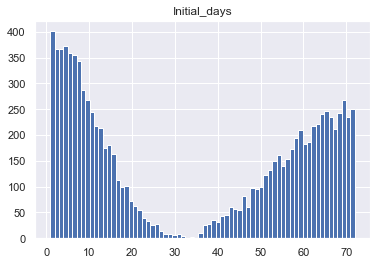

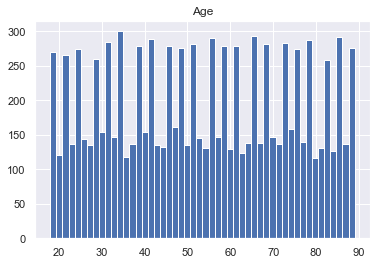

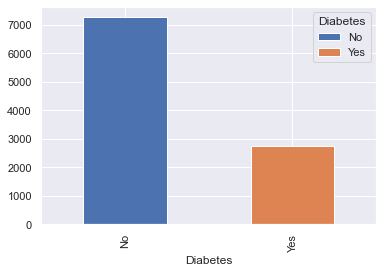

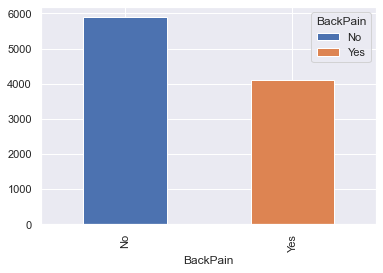

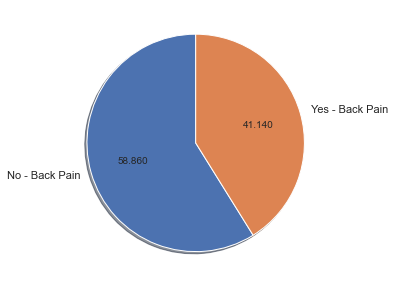

In [82]:
# Conducting the Univariate Analysis with Plots

# For Initial_days
M_Analysis.hist('Initial_days',bins=70)
# For Age
M_Analysis.hist('Age',bins=50)
# For Diabetes
tbl = pd.pivot_table(M_Analysis.groupby(['Diabetes']).size().reset_index(),
values=0,
index='Diabetes',
columns=['Diabetes'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
# For BackPain
tbl = pd.pivot_table(M_Analysis.groupby(['BackPain']).size().reset_index(),
values=0,
index='BackPain',
columns=['BackPain'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
# For Back Pain (percentage view)
plt.figure(figsize=(5,5))
plt.pie(M_Analysis['BackPain'].value_counts(), startangle=90, autopct='%.3f',
       labels=['No - Back Pain', 'Yes - Back Pain'], shadow= True)

### Univariate Analysis Results:
- Initial_days: During their initial visit, patients stayed the most during the first 9 days, then it takes a dip to 0 in the 30's, and finally begins to increase again at about 35 all the way to 70.
- Age: About half of the recorded population remains constant with highest peaks from 250-300 people with every bin in each decade, and the lowest remains constant from about 100-160 people with every bin in each decade.
- Diabetes: The majority of people don't have diabetes.
- Backpain: The majority of people don't have back pain.

# Bivariate Analysis-
### Bivariate analysis is used to study the existing relationship between two variables. In real life, this is useful and helps to find possible associations between variables and the strength of it, if any.

In [84]:
# In order to conduct Bivariate Analysis and visuals, I will convert ReAdmis and Asthma into boolean values.
M_Analysis['ReAdmis'].replace((1, 0),('Yes', 'No'), inplace=True)
M_Analysis['Asthma'].replace((1, 0),('Yes', 'No'), inplace=True)

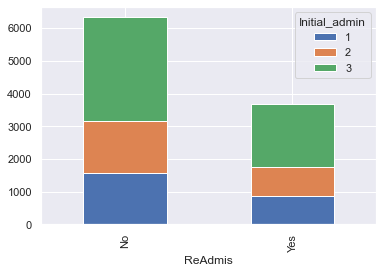

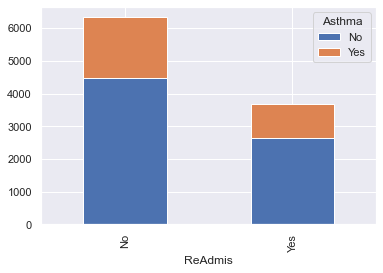

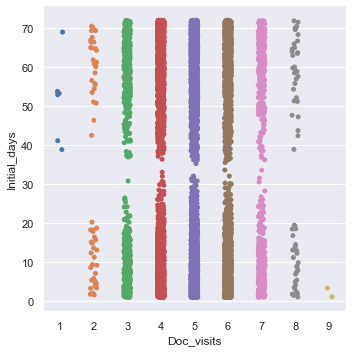

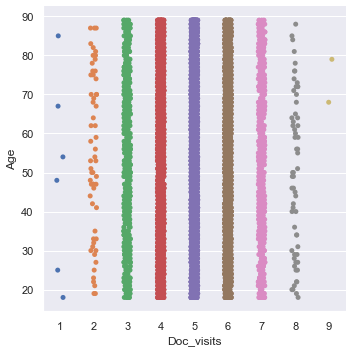

In [85]:
#Bivariate Analysis with a stacked bars graphs and catplots.
tbl = pd.pivot_table(M_Analysis.groupby(['ReAdmis','Initial_admin']).size().reset_index(),
values=0,
index='ReAdmis',
columns=['Initial_admin'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(M_Analysis.groupby(['ReAdmis','Asthma']).size().reset_index(),
values=0,
index='ReAdmis',
columns=['Asthma'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
sns.catplot(x="Doc_visits", y="Initial_days", data=M_Analysis)
sns.catplot(x="Doc_visits", y="Age", data=M_Analysis)

### Bivariate Analysis Results:
- It is less likely for people to be re-admitted after the initial_days.
- It is less likely for people to be who don't have asthma compared to those who do.
- Doc_visits and Initial_days are correlated.
- Doc_visits and Age are correlated.

# C and D: Identifying and Representing the Variables-
- Univariate: I created distribution graphs for the two continuous variables Initial_days and Age.
- Univariate: I created bar graphs for the two categorical variables Diabetes and Backpain.
- Bivariate: I created catplots for the two continuous variables Initial_days and Age.
- Bivariate: I created stacked barplots for the two continuous variables Initial_days and Asthma.
- Implications: We fail to reject the null hypothesis on the variables Initial_admin, Asthma, Initial_days, and Age, which can increase re-admission probability. The higher the age and those diagnosed with asthma, the more probable the patient is to be re-admitted. The initial medical diagnosis and duration of the first stay may also increase the probability of reocurring admissions as observed in the plots above.

## E. Summary-

1.  Results of the hypothesis test (please see results throughout the code).

2.  Limitations: The data set does not provide further details with multiple variables and the analysis therefore cannot be further explored.

3.  Course of action based on the results: To decrease re-admission rates, it is recommended that doctors help patients with preventative medicine, nutritional, exercise, and stress management advice. Furthermore, this can decrease fines, open more space to allow patients to stay in the hospital, and cut down bills in multiple departments, saving money in the long run.

# References:
- 3 easy ways to print column names in Python. AskPython. (2020, November 17). Retrieved July 28, 2022, from https://www.askpython.com/python-modules/pandas/print-column-names-in-python 

- How do I interpret negative correlation and positive ... - researchgate. (n.d.). Retrieved July 28, 2022, from https://www.researchgate.net/post/How_do_I_interpret_negative_correlation_and_positive_correlation 

- Python - Pearson Correlation Test between two variables. GeeksforGeeks. (2021, September 15). Retrieved July 28, 2022, from https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/ 

- Scipy.stats.ttest_ind#. scipy.stats.ttest_ind - SciPy v1.8.1 Manual. (n.d.). Retrieved July 28, 2022, from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#:~:text=ttest_ind,-scipy.stats.&amp;text=Calculate%20the%20T%2Dtest%20for,identical%20average%20(expected)%20values 